In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

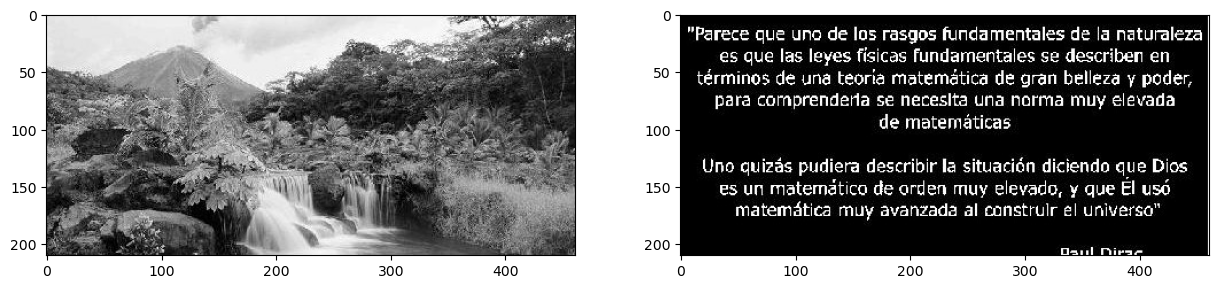

In [2]:
img_foto = cv.imread("archives/paisaje_foto.jpeg")
img_text = cv.imread("archives/paisaje_texto.jpeg")

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 15))
ax1.imshow(img_foto)
ax2.imshow(img_text)

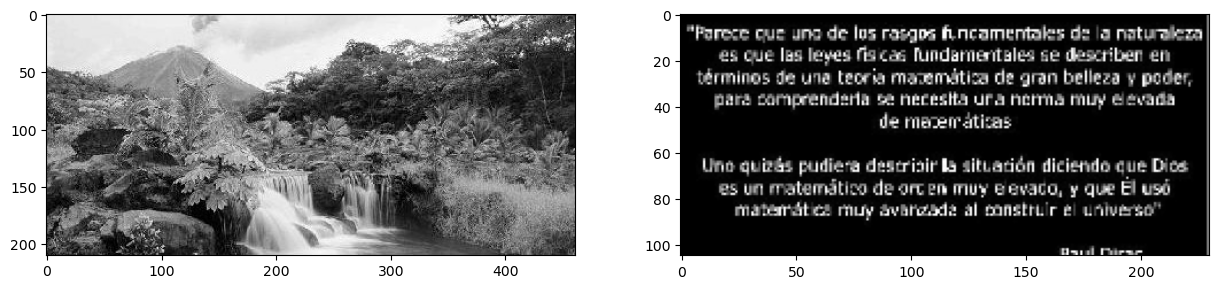

In [3]:
dist = cv.resize(img_text,(int(img_text.shape[1]/2),int(img_text.shape[0]/2)),cv.INTER_CUBIC)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15, 15))
ax1.imshow(img_foto)
ax2.imshow(dist)

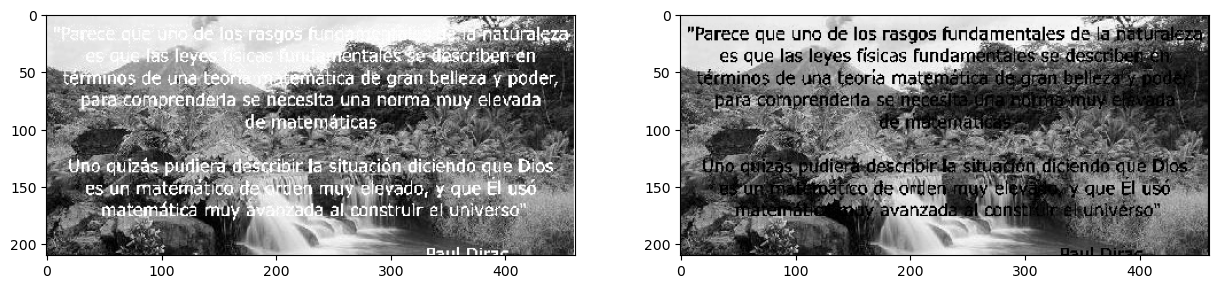

In [4]:
imagen_combinada_tw = cv.bitwise_or(img_foto, img_text)
imagen_combinada_tb = cv.bitwise_and(img_foto, cv.bitwise_not(img_text))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 15))
ax1.imshow(imagen_combinada_tw)
ax2.imshow(imagen_combinada_tb)

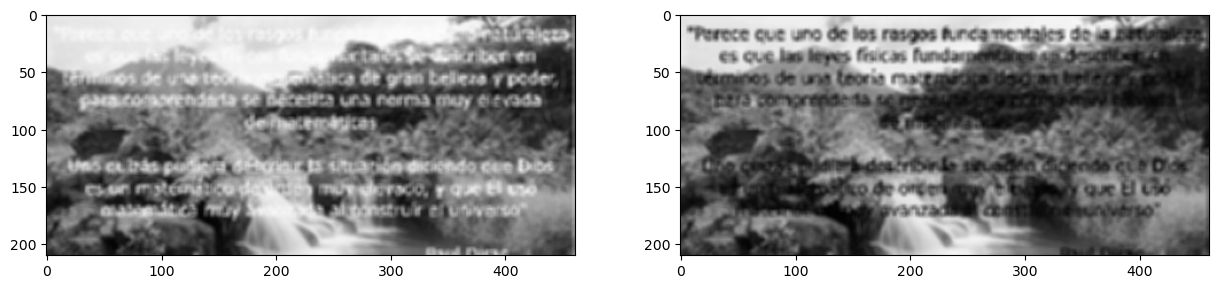

In [5]:
imagen_desenfocada_tw = cv.GaussianBlur(imagen_combinada_tw,(5,5),2)
imagen_desenfocada_tb = cv.GaussianBlur(imagen_combinada_tb,(5,5),2)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 15))
ax1.imshow(imagen_desenfocada_tw)
ax2.imshow(imagen_desenfocada_tb)

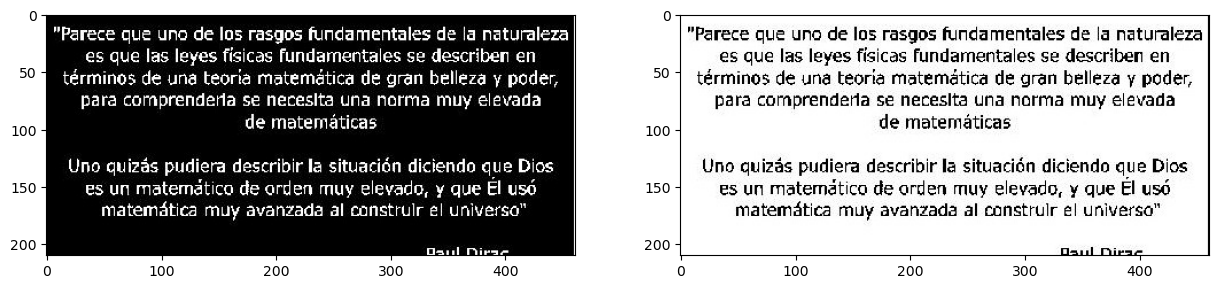

In [6]:
texto_tw = cv.bitwise_and(imagen_combinada_tw, img_text)
texto_tb = cv.bitwise_or(imagen_combinada_tb, cv.bitwise_not(img_text))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 15))
ax1.imshow(texto_tw)
ax2.imshow(texto_tb)

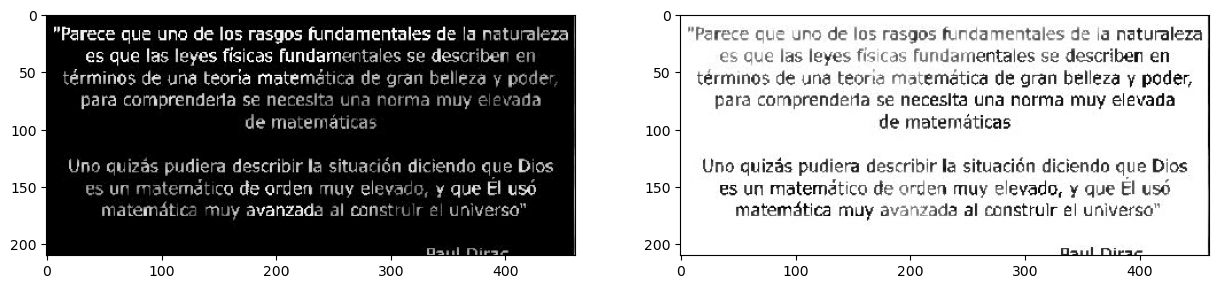

In [7]:
mascara_tw = cv.bitwise_and(imagen_desenfocada_tw,texto_tw)
mascara_tb = cv.bitwise_or(imagen_desenfocada_tb, texto_tb)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 15))
ax1.imshow(mascara_tw)
ax2.imshow(mascara_tb)

In [8]:
salida_tw = cv.bitwise_and(imagen_combinada_tw, mascara_tb)
salida_tb = cv.bitwise_or(imagen_combinada_tb, mascara_tw)

n = 10

# fig, axes = plt.subplots(n*2,4,figsize=(15, 45))
# r = 0
for _ in range(n):
    
    blur_tw = cv.GaussianBlur(salida_tw, (5,5), 0)
    imagen_salida_tw = cv.bitwise_and(salida_tw, cv.bitwise_not(img_text))
    mascara_tb = cv.bitwise_and(blur_tw, img_text)
    salida_tw = cv.bitwise_or(imagen_salida_tw, mascara_tb)

    blur_tb = cv.GaussianBlur(salida_tb, (5,5), 0)
    imagen_salida_tb = cv.bitwise_and(salida_tb, cv.bitwise_not(img_text))
    mascara_tw = cv.bitwise_and(blur_tb, img_text)
    salida_tb = cv.bitwise_or(imagen_salida_tb, mascara_tw)

    # En las filas impares se mostrara el proceso que conlleva la imagen con el texto blanco
    # axes[r][0].imshow(blur_tw)
    # axes[r][1].imshow(imagen_salida_tw)
    # axes[r][2].imshow(mascara_tb)
    # axes[r][3].imshow(salida_tw)
    # r+=1

    # En las filas pares se mostrara el proceso que conlleva la imagen con el texto negro
    # axes[r][0].imshow(blur_tb)
    # axes[r][1].imshow(imagen_salida_tb)
    # axes[r][2].imshow(mascara_tw)
    # axes[r][3].imshow(salida_tb)
    # r+=1

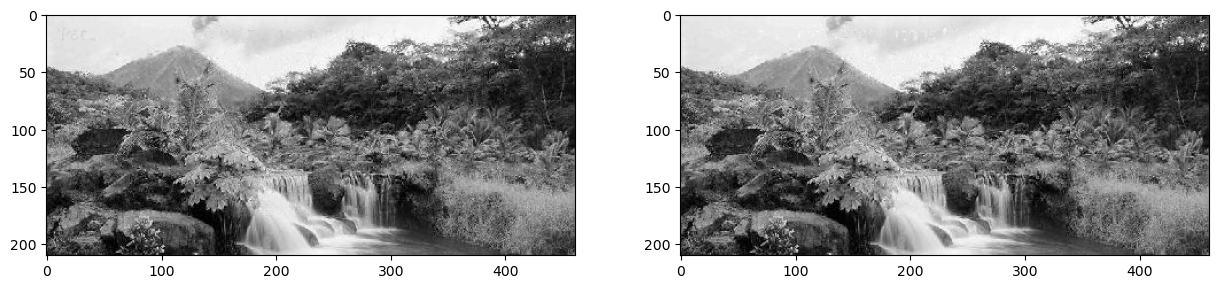

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 15))
ax1.imshow(salida_tw)
ax2.imshow(salida_tb)